PyTorch에서는 torch.nn.RNN, torch.nn.LSTM, torch.nn.GRU 클래스를 사용하여 순환 신경망을 쉽게 구현할 수 있습니다. 각 클래스는 공통적으로 아래와 같은 주요 파라미터를 가집니다.

- input_size: 입력 특성의 차원 (예: 피처 개수)

- hidden_size: 은닉 상태의 차원 (뉴런 개수)

- num_layers: RNN의 레이어 개수 (층이 깊을수록 복잡한 패턴 학습 가능)

- batch_first: True이면 입력 텐서의 첫 번째 차원이 배치 크기가 됨 (기본값은 False)

- dropout: 층 간 드롭아웃 적용 여부 (과적합 방지)

- bidirectional: 양방향 RNN 사용 여부 (기본값 False)

### RNN

In [1]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=False)

In [2]:
x = torch.randn(3, 32, 10)                          # --> (seq_len, batch_size, input_size)
out, hidden = rnn(x)
print(out.shape, hidden.shape)

torch.Size([3, 32, 20]) torch.Size([1, 32, 20])


In [5]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

x = torch.randn(32, 3, 10)                          # --> (batch_size, seq_len, input_size)
out, hidden = rnn(x)
print(out.shape, hidden.shape)

torch.Size([32, 3, 20]) torch.Size([1, 32, 20])


In [ ]:
# "나는 학교에 간다"
# "나는 학원에 간다"
# "나는 회사에 간다"

# "나는" --> torch.randn(10)
# "학교에" --> torch.randn(10)

In [6]:
out[-1,:,:]     # out의 마지막 배치

tensor([[ 1.2410e-01, -6.2113e-02, -2.6842e-01,  2.6658e-01, -9.9562e-02,
          1.1994e-01,  4.1773e-01, -1.8941e-01, -3.7828e-01,  2.9136e-01,
          1.1285e-01,  1.9901e-05, -3.7300e-02, -3.7724e-01, -3.6085e-01,
          2.5748e-01, -9.0455e-02,  1.0569e-01,  2.7860e-01, -1.3555e-02],
        [-2.5163e-01, -1.5627e-01, -5.1089e-01, -3.2072e-02, -3.8213e-01,
         -3.7129e-01,  2.8822e-01,  2.4834e-01, -4.7894e-01,  1.0059e-01,
          1.6844e-01,  2.9172e-01, -9.1900e-02, -4.6426e-01, -7.1693e-01,
          1.0435e-01,  2.1609e-01,  7.9240e-01,  2.1182e-01, -1.4401e-01],
        [-4.3408e-01, -1.4311e-01, -2.7111e-01, -3.8381e-01, -1.3544e-01,
          2.9214e-01,  2.5275e-02,  3.0792e-01, -7.4143e-01, -6.8578e-01,
          1.3901e-01, -6.9509e-01,  5.1216e-01,  2.7730e-01,  2.6047e-01,
          6.9304e-01,  2.0904e-01,  4.5363e-01, -4.1194e-02, -2.2762e-01]],
       grad_fn=<SliceBackward0>)

out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

In [7]:
hidden[:,-1,:]      #hidden의 마지막 배치

tensor([[-0.4341, -0.1431, -0.2711, -0.3838, -0.1354,  0.2921,  0.0253,  0.3079,
         -0.7414, -0.6858,  0.1390, -0.6951,  0.5122,  0.2773,  0.2605,  0.6930,
          0.2090,  0.4536, -0.0412, -0.2276]], grad_fn=<SliceBackward0>)

In [ ]:
out_last = out[:, -1, :]      # [32, 20]
hidden_last = hidden[-1]
print(torch.allclose(out_last, hidden_last))

### LSTM

In [10]:
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

x = torch.randn(32, 3, 10)
out, (hidden, cell) = lstm(x)
print(out.shape, hidden.shape, cell.shape)

torch.Size([32, 3, 20]) torch.Size([1, 32, 20]) torch.Size([1, 32, 20])


- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

- cell: 마지막 타임스텝의 셀 상태 ([num_layers, batch_size, hidden_size])



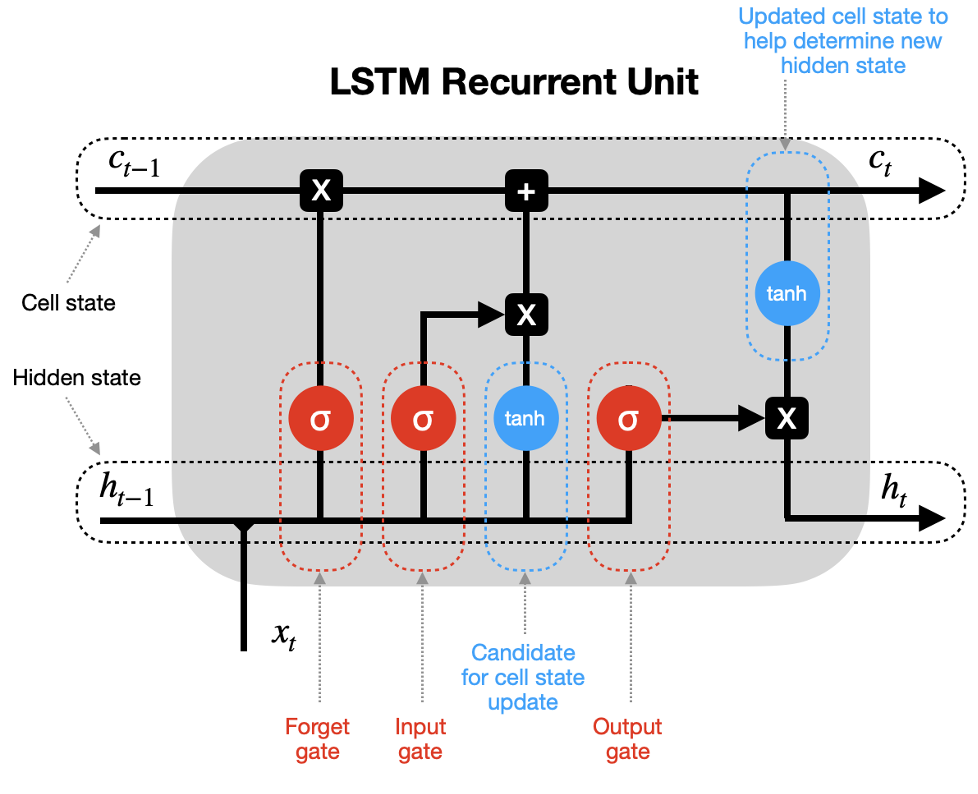

In [11]:
out[-1,:,:]

tensor([[ 0.0470, -0.0135,  0.0251, -0.0634,  0.0201, -0.1516,  0.1400, -0.1500,
         -0.0374,  0.0715,  0.0519, -0.1573,  0.1719,  0.1179,  0.1429, -0.0897,
          0.0131,  0.0518, -0.0082,  0.0645],
        [ 0.1397,  0.0115,  0.0456, -0.0094, -0.1574, -0.1591,  0.1832, -0.2634,
          0.0973,  0.1717,  0.0385, -0.0868,  0.1668,  0.1238,  0.0942, -0.1293,
         -0.0910,  0.1755, -0.0666, -0.0741],
        [-0.0510,  0.0472,  0.0348,  0.0965, -0.0597, -0.2037, -0.0131, -0.3331,
          0.1493,  0.1069,  0.1180, -0.1336,  0.1423,  0.1587, -0.0587, -0.1316,
         -0.1406,  0.0477, -0.1860, -0.1273]], grad_fn=<SliceBackward0>)

In [12]:
hidden[:,-1,:]

tensor([[-0.0510,  0.0472,  0.0348,  0.0965, -0.0597, -0.2037, -0.0131, -0.3331,
          0.1493,  0.1069,  0.1180, -0.1336,  0.1423,  0.1587, -0.0587, -0.1316,
         -0.1406,  0.0477, -0.1860, -0.1273]], grad_fn=<SliceBackward0>)

In [13]:
cell[:,-1,:]

tensor([[-0.1308,  0.1045,  0.0841,  0.2232, -0.1271, -0.4821, -0.0253, -0.7027,
          0.3605,  0.2356,  0.1779, -0.2553,  0.4896,  0.2795, -0.1025, -0.3359,
         -0.3648,  0.0979, -0.3414, -0.2264]], grad_fn=<SliceBackward0>)

### GRU

In [14]:
gru = nn.GRU(input_size=10, hidden_size=20, num_layers=2, batch_first=True)

x = torch.randn(5, 3, 10)
out, hidden = gru(x)
print(out.shape, hidden.shape)

torch.Size([5, 3, 20]) torch.Size([2, 5, 20])


- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

## 시계열 데이터 실습

### 간단한 데이터 생성

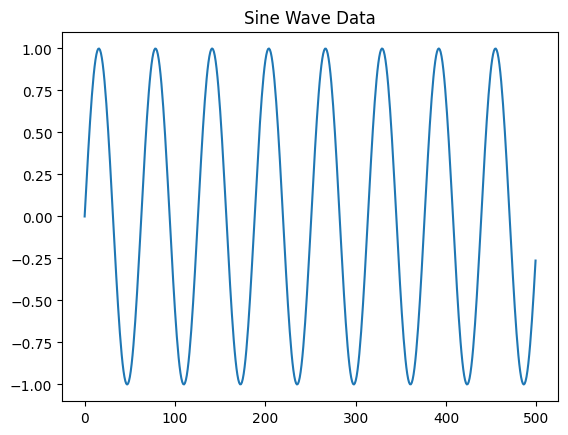

In [15]:
# 간단 사인 함수 데이터로 시계열 예측

import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(seq_length, num_samples):
    x = np.linspace(0, seq_length, num_samples)
    y = np.sin(x)
    return y

# 데이터 생성 및 시각화
data = generate_sine_wave(seq_length=50, num_samples=500)
plt.plot(data)
plt.title("Sine Wave Data")
plt.show()

In [16]:
from typing import Sequence
import torch

# 시계열 데이터를 모델이 학습할 수 있도록 입력과 정답(label)로 변환하는 함수
def create_sqences(data, seq_length):
    sequence = []   # 입력 데이터 시퀀스를 저장할 리스트
    labels = []     # 정답 값을 저장할 리스트

    # 주어진 데이터에서 일정 길이(seq_length)만큼의 연속된 데이터를 입력 시퀀스로 만들고
    # 해당 시퀀스 바로다음 값(y)을 정답으로 설정
    for i in range(len(data) - seq_length):
        sequence.append(data[i:i+seq_length])   # seq_length만큼의 데이터를 입력으로 사용
        labels.append(data[i+seq_length])   # 해당 시퀀스의 다음 값을 정답으로 설정

    # 리스트를 numpy 배열로 변환 후 pytorch tensor로 변환
    sequence = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(-1)
    labels = torch.tensor(np.array(labels), dtype=torch.float32)

    return sequence, labels

seq_length = 50
X, y = create_sqences(data, seq_length)
print(X.shape, y.shape)     # 변환된 데이터의 크기 확인

torch.Size([450, 50, 1]) torch.Size([450])


In [17]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        ht = out[:, -1, :]
        return self.fc(ht)

In [ ]:
# out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size]) h1 h2 h3 .... ht -> ht

In [19]:
# 데이터 생성 및 전처리
seq_length = 50
num_samples = 500
data = generate_sine_wave(seq_length, num_samples)
X, y = create_sqences(data, seq_length)

print(X.shape, y.shape)     # 변환된 데이터 크기 확인

torch.Size([450, 50, 1]) torch.Size([450])


In [20]:
# 모델 초기화
input_size = 1
hidden_size = 20
num_layers = 2
model = RNNModel(input_size, hidden_size, num_layers)

---

### 🧠 요약

| 단계 | 구성 요소         | 입력 텐서       | 출력 텐서       |
|------|------------------|------------------|------------------|
| 입력 | 시계열 데이터     | `[450, 50, 1]`   | -                |
| RNN Layer 1 | `nn.RNN(1, 20)` | `[450, 50, 1]`   | `[450, 50, 20]`  |
| RNN Layer 2 | `num_layers=2`  | `[450, 50, 20]`  | `[450, 50, 20]`  |
| 마지막 상태 선택 | `out[:, -1, :]` | `[450, 50, 20]`  | `[450, 20]`      |
| 출력층 | `Linear(20 → 1)` | `[450, 20]`      | `[450, 1]`       |

---

### 🔍 설명

- **배치 크기 450**: 450개의 독립된 시계열 샘플을 병렬 처리.
- **시퀀스 길이 50**: 각 시계열은 50개의 time step으로 구성됨.
- **입력 차원 1**: 단변량 시계열 (예: 온도, 주가 등).
- **RNN Layer**: 두 개의 계층으로 구성되어 시퀀스 정보를 단계적으로 추출.
- **Linear Layer**: 마지막 time step의 출력을 받아 스칼라 값으로 매핑.

---

In [21]:
# 손실 함수 및 최적화 알고리즘
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    opt.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs.squeeze(), y)
    loss.backward()
    opt.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0/100], Loss: 0.5583
Epoch [10/100], Loss: 0.3687
Epoch [20/100], Loss: 0.1854
Epoch [30/100], Loss: 0.0779
Epoch [40/100], Loss: 0.0408
Epoch [50/100], Loss: 0.0227
Epoch [60/100], Loss: 0.0096
Epoch [70/100], Loss: 0.0040
Epoch [80/100], Loss: 0.0025
Epoch [90/100], Loss: 0.0023


(450, 1)


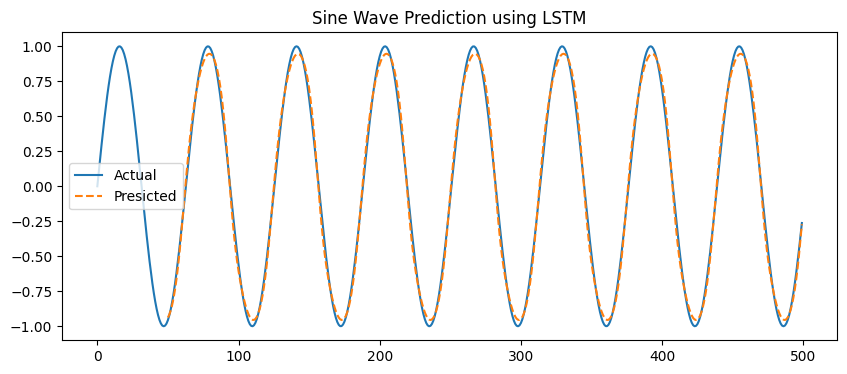

In [25]:
# 예측 시각화
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()
    print(predictions.shape)

plt.figure(figsize=(10, 4))
plt.plot(data, label="Actual")
plt.plot(range(seq_length, seq_length + len(predictions)), predictions, label="Presicted", linestyle="dashed")
plt.legend()
plt.title("Sine Wave Prediction using LSTM")
plt.show()